In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# loading data

In [2]:
vix_df = pd.read_csv(r'C:\Users\USER\Downloads\archive\INDIAVIX.csv')
vix_df

,Date,Open,High,Low,Close,Previous,Change,%Change
0,2009-03-02,43.1900,43.3800,41.4400,43.1700,NaN,0.00,0.0000
1,2009-03-03,43.1700,43.9000,41.2000,43.8900,43.1700,0.72,0.0167
2,2009-03-04,43.8900,43.8900,42.1600,42.5200,43.8900,-1.37,-0.0312
3,2009-03-05,42.5200,42.7100,40.4100,41.4900,42.5200,-1.03,-0.0242
4,2009-03-06,41.4900,41.4900,37.5700,38.1600,41.4900,-3.33,-0.0803
...,...,...,...,...,...,...,...,...
3056,2021-07-01,13.0450,13.2825,12.3300,12.8400,13.0450,-0.21,-0.0157
3057,2021-07-02,12.8400,13.0200,12.0225,12.0900,12.8400,-0.75,-0.0584
3058,2021-07-05,12.0900,12.6225,11.9875,12.0675,12.0900,-0.02,-0.0019
3059,2021-07-06,12.0675,12.3600,11.2900,12.2750,12.0675,0.21,0.0172


# Data Preprocessing

In [3]:
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df.set_index('Date', inplace=True)


In [4]:
print(vix_df.isna().sum())

Open        0
High        0
Low         0
Close       0
Previous    1
Change      0
%Change     0
dtype: int64


In [15]:
vix_values = vix_df['%Change'] 
vix_values

Date
2009-03-02    0.0000
2009-03-03    0.0167
2009-03-04   -0.0312
2009-03-05   -0.0242
2009-03-06   -0.0803
               ...  
2021-07-01   -0.0157
2021-07-02   -0.0584
2021-07-05   -0.0019
2021-07-06    0.0172
2021-07-07   -0.0051
Name: %Change, Length: 3061, dtype: float64

# Calculate Volatility

In [10]:
vix_df['Daily Return'] = vix_df['%Change'].pct_change()
volatility = vix_df['Daily Return'].std()
print(f'Volatility (Standard Deviation) of Indian VIX: {volatility}')

Volatility (Standard Deviation) of Indian VIX: nan


# #Plot Daily Returns

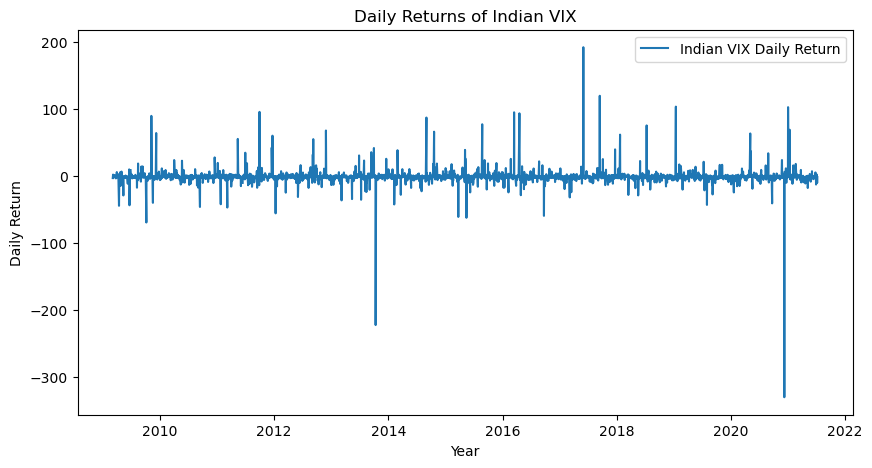

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(vix_df['Daily Return'], label='Indian VIX Daily Return')
plt.title('Daily Returns of Indian VIX')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Rolling Volatility Analysis

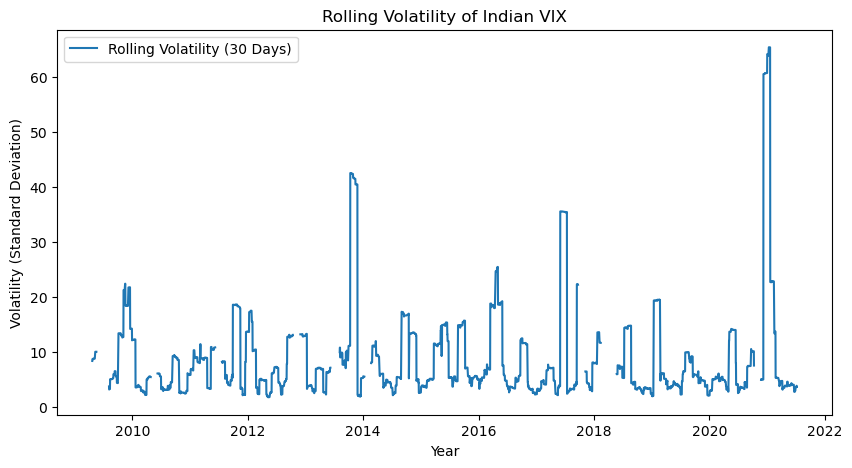

In [13]:
vix_df['Rolling Volatility'] = vix_df['Daily Return'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(vix_df['Rolling Volatility'], label='Rolling Volatility (30 Days)')
plt.title('Rolling Volatility of Indian VIX')
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.show()

In [14]:
vix_df.to_csv('Indian_VIX_Volatility_Analysis.csv')
plt.savefig('indian_vix_volatility.png')


<Figure size 640x480 with 0 Axes>